# US Car Accident Severity Prediction
This is the dataset we will be using https://www.kaggle.com/sobhanmoosavi/us-accidents


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# # Population (United States) (~3000000 rows)
# file = drive.CreateFile({'id':"1hiQSQ-tLiP5GkUkBtdFotBCkEa_RkUwD"})
# file.GetContentFile('df.csv')
# df = pd.read_csv('df.csv')

In [0]:
# Sample of Los Angeles County (60000 rows)
file = drive.CreateFile({'id':"1IIGaomc_qWH-_BGMFsc7yRQPhfvPCEpJ"})
file.GetContentFile('sample.csv')
df = pd.read_csv('sample.csv', delimiter='\t')

## Clean the Sample

In [0]:
df.head()

,Unnamed: 0,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,2766240,A-2766264,Bing,NaN,2,2018-06-06 15:33:34,2018-06-06 21:33:34,33.925680,-118.369090,33.91832,-118.37047,0.515,Ramp to I-405 SB and W El Segundo Blvd - Accid...,NaN,San Diego Fwy S,R,Hawthorne,Los Angeles,CA,90250,US,US/Pacific,KHHR,2018-06-06 15:53:00,68.0,NaN,63.0,29.88,10.0,WSW,11.5,NaN,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,2027187,A-2027210,MapQuest,201.0,2,2017-11-18 15:46:29,2017-11-18 16:16:08,34.021965,-117.813141,NaN,NaN,0.000,Accident on CA-60 Eastbound at Exit 26 CA-57.,NaN,Pomona Fwy E,R,Diamond Bar,Los Angeles,CA,91765,US,US/Pacific,KPOC,2017-11-18 15:47:00,75.2,NaN,19.0,30.08,10.0,Calm,NaN,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,95469,A-95471,MapQuest,241.0,2,2016-09-06 07:24:26,2016-09-06 08:02:00,34.154549,-118.382820,NaN,NaN,0.000,#1 &amp; #2 lane blocked due to accident on US...,NaN,US-101 N,R,North Hollywood,Los Angeles,CA,91602,US,US/Pacific,KBUR,2016-09-06 07:53:00,63.0,NaN,78.0,29.83,10.0,Calm,NaN,NaN,Scattered Clouds,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
3,765566,A-765575,MapQuest,201.0,3,2019-08-25 20:43:26,2019-08-25 21:42:39,34.231712,-118.404091,NaN,NaN,0.000,#3& #4 lane blocked due to accident on I-5 Nor...,NaN,Golden State Fwy N,R,Sun Valley,Los Angeles,CA,91352,US,US/Pacific,KBUR,2019-08-25 20:53:00,78.0,78.0,42.0,29.10,10.0,SE,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
4,2843962,A-2843986,Bing,NaN,2,2017-12-12 10:30:15,2017-12-12 16:30:15,34.064830,-118.245630,34.06084,-118.25105,0.415,At US-101/Hollywood Fwy - Accident. Right lane...,948.0,Alpine St,L,Los Angeles,Los Angeles,CA,90012-2159,US,US/Pacific,KCQT,2017-12-12 10:47:00,75.9,NaN,6.0,30.15,10.0,Calm,NaN,NaN,Clear,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 50 columns):
Unnamed: 0               60000 non-null int64
ID                       60000 non-null object
Source                   60000 non-null object
TMC                      40950 non-null float64
Severity                 60000 non-null int64
Start_Time               60000 non-null object
End_Time                 60000 non-null object
Start_Lat                60000 non-null float64
Start_Lng                60000 non-null float64
End_Lat                  19050 non-null float64
End_Lng                  19050 non-null float64
Distance(mi)             60000 non-null float64
Description              60000 non-null object
Number                   11530 non-null float64
Street                   60000 non-null object
Side                     60000 non-null object
City                     59999 non-null object
County                   60000 non-null object
State                    60000 non-null 

In [0]:
df.shape

(60000, 50)

## Preparing the Data

### Date Time Preferences

There are significant values in the datetime column that could be useful for modeling, therefore we will use some of these datetime columns to create new columns, 'Year', 'Month', 'Day', 'Hour', and 'Weekday'.

In [0]:
# Convert Start_Time and End_Time to Pandas datetime
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')

In [0]:
# Create Columns Year, Month, Day, Hour, Weekday based on Start_time
df['Year']=df['Start_Time'].dt.year
df['Month']=df['Start_Time'].dt.strftime('%b')
df['Day']=df['Start_Time'].dt.day
df['Hour']=df['Start_Time'].dt.hour
df['Weekday']=df['Start_Time'].dt.strftime('%a')


In [0]:
# Create Time Duration Column
df['Time_Duration(min)']=round((df['End_Time']-df['Start_Time'])/np.timedelta64(1,'m'))

In [0]:
df['Time_Duration(min)'].describe()

count    60000.000000
mean        92.641133
std        194.421673
min         11.000000
25%         30.000000
50%         45.000000
75%         72.000000
max      36724.000000
Name: Time_Duration(min), dtype: float64

In [0]:
df[['Year','Month','Day','Hour','Weekday']].head()

,Year,Month,Day,Hour,Weekday
0,2018,Jun,6,15,Wed
1,2017,Nov,18,15,Sat
2,2016,Sep,6,7,Tue
3,2019,Aug,25,20,Sun
4,2017,Dec,12,10,Tue


In [0]:
df['Year'].value_counts()

2019    17771
2018    14617
2016    13819
2017    13793
Name: Year, dtype: int64

In [0]:
df['Month'].value_counts()

Oct    6883
Sep    6403
Dec    5899
Nov    5645
Apr    5201
Aug    5148
Jun    4896
May    4565
Jul    4494
Mar    4173
Jan    3536
Feb    3157
Name: Month, dtype: int64

Text(0.5, 1.0, 'Accidents by Day of Month')

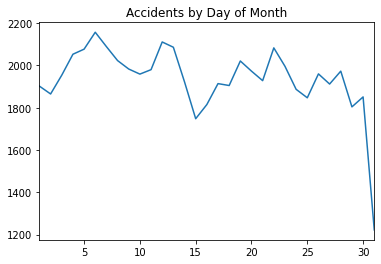

In [0]:
df['Day'].value_counts().sort_index().plot()
plt.title("Accidents by Day of Month")

# This shows 31st as very low because there are only a some months with 31 days

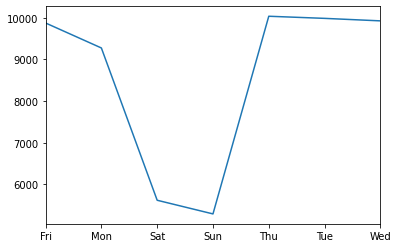

In [0]:
df['Weekday'].value_counts().sort_index().plot()

In [0]:
# No outliers it seems

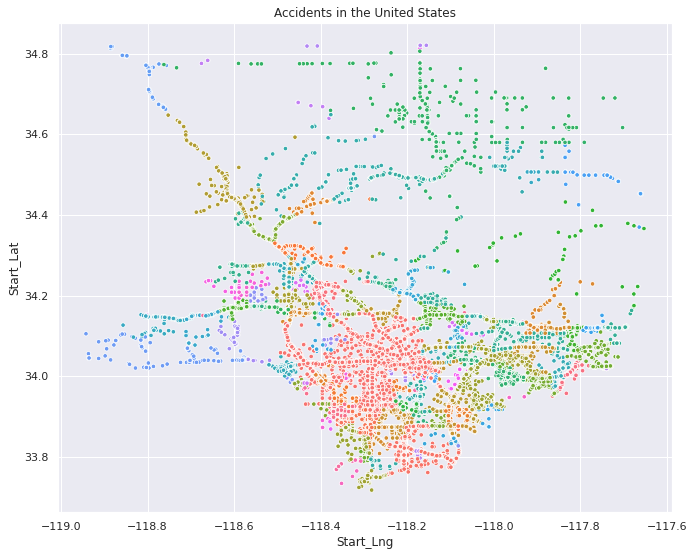

In [0]:
sns.set(rc={'figure.figsize':(11,9)})
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df, hue='City', legend=False, s=20)
plt.title("Accidents in the United States")

plt.show()

### Select Columns for Machine Learning Model

From all the features, we only select the features significant to our classification model.

In [0]:
feature_lst=['Source','TMC','Severity','Start_Lng','Start_Lat','Distance(mi)','Side','City','County','State','Timezone','Temperature(F)','Humidity(%)','Pressure(in)', 'Visibility(mi)', 'Wind_Direction','Weather_Condition','Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop','Sunrise_Sunset','Hour','Weekday', 'Time_Duration(min)']

In [0]:
df_sel=df[feature_lst].copy()
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 34 columns):
Source                60000 non-null object
TMC                   40950 non-null float64
Severity              60000 non-null int64
Start_Lng             60000 non-null float64
Start_Lat             60000 non-null float64
Distance(mi)          60000 non-null float64
Side                  60000 non-null object
City                  59999 non-null object
County                60000 non-null object
State                 60000 non-null object
Timezone              60000 non-null object
Temperature(F)        58212 non-null float64
Humidity(%)           58147 non-null float64
Pressure(in)          58339 non-null float64
Visibility(mi)        58292 non-null float64
Wind_Direction        58290 non-null object
Weather_Condition     58340 non-null object
Amenity               60000 non-null bool
Bump                  60000 non-null bool
Crossing              60000 non-null bool
Give_Way  

### View and Remove Null Values

In [0]:
# Drop rows with null values
df_sel.isnull().mean()

Source                0.000000
TMC                   0.317500
Severity              0.000000
Start_Lng             0.000000
Start_Lat             0.000000
Distance(mi)          0.000000
Side                  0.000000
City                  0.000017
County                0.000000
State                 0.000000
Timezone              0.000000
Temperature(F)        0.029800
Humidity(%)           0.030883
Pressure(in)          0.027683
Visibility(mi)        0.028467
Wind_Direction        0.028500
Weather_Condition     0.027667
Amenity               0.000000
Bump                  0.000000
Crossing              0.000000
Give_Way              0.000000
Junction              0.000000
No_Exit               0.000000
Railway               0.000000
Roundabout            0.000000
Station               0.000000
Stop                  0.000000
Traffic_Calming       0.000000
Traffic_Signal        0.000000
Turning_Loop          0.000000
Sunrise_Sunset        0.000017
Hour                  0.000000
Weekday 

In [0]:
df_sel.dropna(subset=df_sel.columns[df_sel.isnull().mean()!=0], how='any', axis=0, inplace=True)
df_sel.shape

(39467, 34)

## Build The Model

Use the dummies method to transform categorical values into numerical values

In [0]:
df_county_dummy = pd.get_dummies(df_sel,drop_first=True)

In [0]:
df_sel = df_county_dummy

In [0]:
target = "Severity"

In [0]:
y = df_sel["Severity"]
X = df_sel.drop(target, axis=1)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Split the datasets into training and test sets

In [0]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

In [0]:
# List of classification algorithms
algorithm_lst=['Logistic Regression',' K-Nearest Neighbors','Decision Trees','Random Forest']

# Initialize an empty list for the accuracy for each algorithm
accuracy_lst=[]

Algorithm 1. Logistic regression

In [0]:
# Logistic regression
lr = LogisticRegression(random_state=0)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

# Get the accuracy score
acc=accuracy_score(y_test, y_pred)

# Append to the accuracy list
accuracy_lst.append(acc)

print("[Logistic regression algorithm] accuracy_score: {:.3f}.".format(acc))

[Logistic regression algorithm] accuracy_score: 0.682.


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Algorithm 2. The K-Nearest Neighbors (KNN) algorithm

In [0]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X_train,y_train)

# Predict the labels for the training data X
y_pred = knn.predict(X_test)

# Get the accuracy score
acc=accuracy_score(y_test, y_pred)

# Append to the accuracy list
accuracy_lst.append(acc)

print('[K-Nearest Neighbors (KNN)] knn.score: {:.3f}.'.format(knn.score(X_test, y_test)))
print('[K-Nearest Neighbors (KNN)] accuracy_score: {:.3f}.'.format(acc))

[K-Nearest Neighbors (KNN)] knn.score: 0.531.
[K-Nearest Neighbors (KNN)] accuracy_score: 0.531.


In [0]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(3, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, n_neighbor in enumerate(neighbors):
    
    # Setup a k-NN Classifier with n_neighbor
    knn = KNeighborsClassifier(n_neighbors=n_neighbor)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)



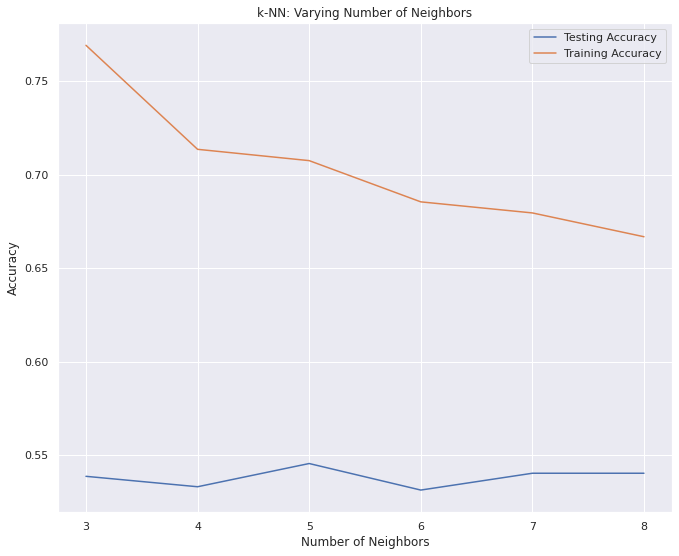

In [0]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

Algorithm C. Decision Tree

In [0]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier


# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)


# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

# Use dt_entropy to predict test set labels
y_pred= dt_entropy.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)


# Print accuracy_entropy
print('[Decision Tree -- entropy] accuracy_score: {:.3f}.'.format(accuracy_entropy))


# Instantiate dt_gini, set 'gini' as the information criterion
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)


# Fit dt_entropy to the training set
dt_gini.fit(X_train, y_train)

# Use dt_entropy to predict test set labels
y_pred= dt_gini.predict(X_test)

# Evaluate accuracy_entropy
accuracy_gini = accuracy_score(y_test, y_pred)

# Append to the accuracy list
acc=accuracy_gini
accuracy_lst.append(acc)

# Print accuracy_gini
print('[Decision Tree -- gini] accuracy_score: {:.3f}.'.format(accuracy_gini))

[Decision Tree -- entropy] accuracy_score: 0.756.
[Decision Tree -- gini] accuracy_score: 0.772.


Algorithm D. Random Forest

In [0]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)


# Get the accuracy score
acc=accuracy_score(y_test, y_pred)

# Append to the accuracy list
accuracy_lst.append(acc)


# Model Accuracy, how often is the classifier correct?
print("[Randon forest algorithm] accuracy_score: {:.3f}.".format(acc))


[Randon forest algorithm] accuracy_score: 0.890.


Visualize important Attributes

No handles with labels found to put in legend.


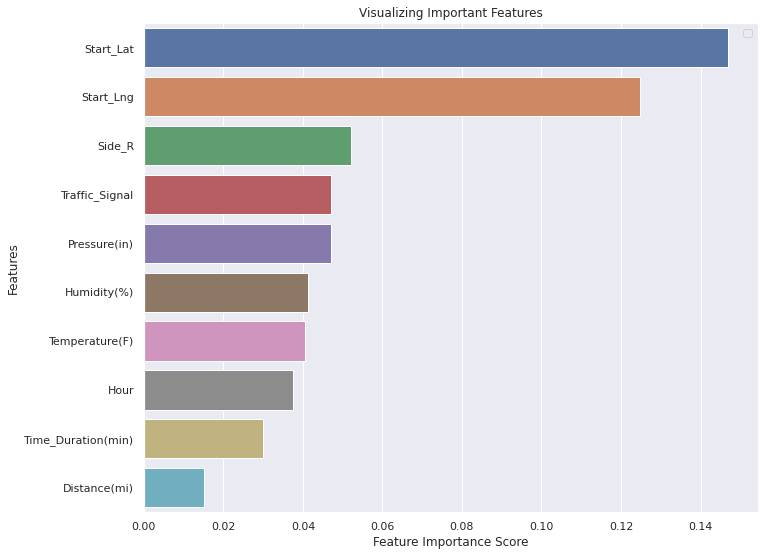

In [0]:

feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)

# Creating a bar plot, displaying only the top k features
k=10
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:k])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

List of important key features

In [0]:
k=20
feature_imp.sort_values(ascending=False)[:k]

Start_Lat                0.147012
Start_Lng                0.124782
Side_R                   0.052217
Traffic_Signal           0.047172
Pressure(in)             0.047055
Humidity(%)              0.041245
Temperature(F)           0.040573
Hour                     0.037462
Time_Duration(min)       0.029972
Distance(mi)             0.015054
Visibility(mi)           0.013513
City_Diamond Bar         0.012850
TMC                      0.012161
City_Rowland Heights     0.012114
City_North Hollywood     0.011327
City_Baldwin Park        0.011137
City_Hacienda Heights    0.009669
City_Los Angeles         0.009342
Junction                 0.008384
Sunrise_Sunset_Night     0.008081
dtype: float64

In [0]:
from sklearn.feature_selection import SelectFromModel

# Create a selector object that will use the random forest classifier to identify features that have an importance of more than 0.03
sfm = SelectFromModel(clf, threshold=0.03)

# Train the selector
sfm.fit(X_train, y_train)

feat_labels=X.columns

# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

Start_Lng
Start_Lat
Temperature(F)
Humidity(%)
Pressure(in)
Traffic_Signal
Hour
Side_R


In [0]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
# Apply The Full Featured Classifier To The Test Data
y_pred = clf.predict(X_test)

# View The Accuracy Of Our Full Feature Model
print('[Randon forest algorithm -- Full feature] accuracy_score: {:.3f}.'.format(accuracy_score(y_test, y_pred)))

# Apply The Full Featured Classifier To The Test Data
y_important_pred = clf_important.predict(X_important_test)

# View The Accuracy Of Our Limited Feature Model
print('[Randon forest algorithm -- Limited feature] accuracy_score: {:.3f}.'.format(accuracy_score(y_test, y_important_pred)))

[Randon forest algorithm -- Full feature] accuracy_score: 0.890.
[Randon forest algorithm -- Limited feature] accuracy_score: 0.894.


Plot the accuracy score versus algorithm

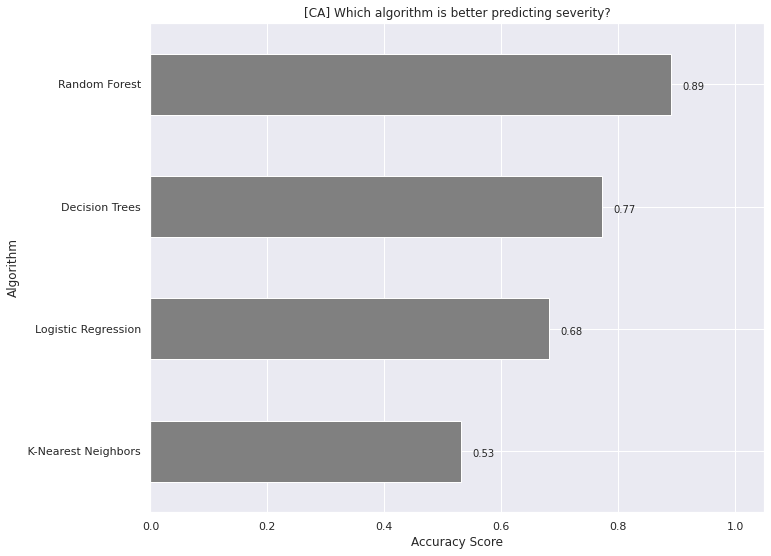

In [0]:
#Make a plot of the accuracy scores for different algorithms
State = 'CA'

# Generate a list of ticks for y-axis
y_ticks=np.arange(len(algorithm_lst))

# Combine the list of algorithms and list of accuracy scores into a dataframe, sort the value based on accuracy score
df_acc=pd.DataFrame(list(zip(algorithm_lst, accuracy_lst)), columns=['Algorithm','Accuracy_Score']).sort_values(by=['Accuracy_Score'],ascending = True)

# Make a plot
ax=df_acc.plot.barh('Algorithm', 'Accuracy_Score', align='center',legend=False,color='0.5')

# Add the data label on to the plot
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+0.02, i.get_y()+0.2, str(round(i.get_width(),2)), fontsize=10)

# Set the limit, lables, ticks and title
plt.xlim(0,1.05)
plt.xlabel('Accuracy Score')
plt.yticks(y_ticks, df_acc['Algorithm'], rotation=0)
plt.title('[{}] Which algorithm is better predicting severity?'.format(State))

plt.show()